In [1]:
import seaborn as sns

import sportsreference
import numpy as np
import pandas as pd
from pandas import DataFrame
from sportsreference.nfl.teams import Teams
from sportsreference.nfl.schedule import Schedule
from sportsreference.nfl.boxscore import Boxscore

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

In [8]:
10*16

sched_dal = Schedule('DAL',2015)
for gamed in sched_dal:
    
    att = gamed.boxscore.attendance 
    
print(att)    

90127


In [14]:
# Collect Data from Dallas and Philidelphia

#stats_dalY = np.zeros((160,2))
stats_dalX = np.zeros((80,20))  # (years, games, number of stats)
#stats_phiY = np.zeros((160,2))
#stats_phiX = np.zeros((160,6))

y = -1
g1 = 0
g2 = 0
year_span = range(2015,2020) #change years here

for year in year_span:
    y += 1
    sched_dal = Schedule('DAL',year)
    sched_phi = Schedule('PHI',year)
    
    for gamed in sched_dal:
#         if (gamed.opponent_abbr == 'PHI'):
        if (gamed.type == 'Reg'):
            stats_dalX[g1,0] = gamed.points_scored
            stats_dalX[g1,1] = gamed.points_allowed
            stats_dalX[g1,2] = gamed.punts
            stats_dalX[g1,3] = gamed.pass_completion_rate
            stats_dalX[g1,4] = gamed.pass_yards
            stats_dalX[g1,5] = gamed.rush_attempts
            stats_dalX[g1,6] = gamed.rush_yards
            dal_yrds_per_rush = stats_dalX[g1,7]/stats_dalX[g1,6]
            stats_dalX[g1,7] = dal_yrds_per_rush
            win = 0
            if (gamed.result == 'Win'):
                win = 1
            stats_dalX[g1,8] = win
            if (gamed.boxscore.home_abbreviation == 'DAL'):
                home_away = 1
                #dal_pen = gamed.boxscore.home_penalties
                #opp_pen = gamed.boxscore.away_penalties
                dal_pen_y = gamed.boxscore.home_yards_from_penalties
                opp_pen_y = gamed.boxscore.away_yards_from_penalties
                dal_sac = gamed.boxscore.home_times_sacked # Times DAL was sacked
                opp_sac = gamed.boxscore.away_times_sacked
                dal_turn = gamed.boxscore.home_turnovers
                opp_turn = gamed.boxscore.away_turnovers
                opp_rush_yds = gamed.boxscore.away_rush_attempts
                opp_rush_att = gamed.boxscore.away_rush_yards
                opp_yrds_rush = opp_rush_yds/opp_rush_att
            else:
                home_away = 0   
                #dal_pen = gamed.boxscore.away_penalties
                #opp_pen = gamed.boxscore.home_penalties
                dal_pen_y = gamed.boxscore.away_yards_from_penalties
                opp_pen_y = gamed.boxscore.home_yards_from_penalties
                dal_sac = gamed.boxscore.away_times_sacked
                opp_sac = gamed.boxscore.home_times_sacked
                dal_turn = gamed.boxscore.away_turnovers
                opp_turn = gamed.boxscore.home_turnovers
                opp_rush_yds = gamed.boxscore.home_rush_attempts
                opp_rush_att = gamed.boxscore.home_rush_yards
                opp_yrds_rush = opp_rush_yds/opp_rush_att
                
            stats_dalX[g1,9] = dal_pen_y
            stats_dalX[g1,10] = opp_pen_y
            stats_dalX[g1,11] = home_away # 1= home, 0 = away
            third_down_rate = gamed.third_down_conversions / gamed.third_down_attempts
            stats_dalX[g1,12] = third_down_rate
            stats_dalX[g1,13] = dal_sac
            stats_dalX[g1,14] = opp_sac
            stats_dalX[g1,15] = dal_turn
            stats_dalX[g1,16] = opp_turn
            stats_dalX[g1,17] = opp_rush_yds
            stats_dalX[g1,18] = opp_rush_att
            stats_dalX[g1,19] = opp_yrds_rush
            
            g1 += 1
#     for gamep in sched_phi:
#         if (gamep.type == 'Reg'):
#     #         if (gamep.opponent_abbr == 'DAL'):
#             stats_phiY[g2,0] = gamep.points_scored
#             stats_phiY[g2,1] = gamep.points_allowed

#             stats_phiX[g2,0] = gamep.punts
#             stats_phiX[g2,1] = gamep.interceptions
#             stats_phiX[g2,2] = gamep.pass_completion_rate
#             stats_phiX[g2,3] = gamep.pass_yards
#             stats_phiX[g2,4] = gamep.rush_attempts
#             stats_phiX[g2,5] = gamep.rush_yards
            
#             g2 += 1    

            
# Make Dataframes            
dfdal = DataFrame(stats_dalX[:,:], columns=['DAL Pts Scored', 'DAL Pts Allowed','DAL Punts',
                                             'DAL Pass Comp Rate', 'DAL Pass Yds', 
                                             'DAL Rush Atts', 'DAL Rush Yards','DAL yds per Rush','DAL Win',
                                             'DAL Penalty Yds', 'OPP Penalty Yards','Home/Away',
                                           'DAL 3rd Down Conv', 'DAL Sacks', 'OPP Sacks', 'DAL Turnonvers',
                                           'OPP Turnonvers','OPP Rush yds','OPP Rush Atts', 'OPP Yds per Rush' ]) 
# dfdalY = DataFrame(stats_dalY[:,:], columns=['DAL Pts Scored', 'DAL Pts Allowed'])

# dfphiX = DataFrame(stats_phiX[:,:], columns=[ 'PHI Punts', 
# 'PHI Ints thrown','PHI Pass Comp', 'PHI Pass Yds', 'PHI Rush Atts', 'PHI Rush Yards' ])
# dfphiY = DataFrame(stats_phiY[:,:], columns=['PHI Pts Scored', 'PHI Pts Allowed'])

# dfXcombo = pd.concat([dfdalX,dfphiX],axis=1)
# dfYcombo = pd.concat([dfdalY,dfphiY],axis=1)


display(dfdal)
# display(dfYcombo)

,DAL Pts Scored,DAL Pts Allowed,DAL Punts,DAL Pass Comp Rate,DAL Pass Yds,DAL Rush Atts,DAL Rush Yards,DAL yds per Rush,DAL Win,DAL Penalty Yds,OPP Penalty Yards,Home/Away,DAL 3rd Down Conv,DAL Sacks,OPP Sacks,DAL Turnonvers,OPP Turnonvers,OPP Rush yds,OPP Rush Atts,OPP Yds per Rush
0,27.0,26.0,2.0,80.0,356.0,23.0,80.0,0.0,1.0,44.0,35.0,0.0,0.545455,1.0,0.0,0.0,3.0,23.0,80.0,0.287500
1,20.0,10.0,6.0,73.5,250.0,33.0,109.0,0.0,1.0,142.0,60.0,0.0,0.333333,3.0,1.0,2.0,3.0,17.0,7.0,2.428571
2,28.0,39.0,4.0,84.6,220.0,21.0,127.0,0.0,0.0,70.0,31.0,0.0,0.166667,1.0,2.0,0.0,1.0,21.0,127.0,0.165354
3,20.0,26.0,5.0,61.5,220.0,28.0,115.0,0.0,0.0,30.0,64.0,0.0,0.250000,3.0,3.0,0.0,0.0,25.0,103.0,0.242718
4,6.0,30.0,6.0,66.7,163.0,24.0,102.0,0.0,0.0,65.0,50.0,0.0,0.285714,5.0,3.0,0.0,2.0,24.0,102.0,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,15.0,26.0,2.0,65.3,323.0,19.0,103.0,0.0,0.0,53.0,66.0,0.0,0.538462,4.0,4.0,0.0,2.0,19.0,103.0,0.184466
76,24.0,31.0,5.0,55.1,326.0,22.0,82.0,0.0,0.0,52.0,30.0,0.0,0.400000,2.0,2.0,0.0,2.0,34.0,151.0,0.225166
77,44.0,21.0,2.0,65.2,212.0,45.0,263.0,0.0,1.0,29.0,16.0,0.0,0.538462,2.0,0.0,1.0,0.0,45.0,263.0,0.171103
78,9.0,17.0,6.0,56.8,257.0,16.0,54.0,0.0,0.0,20.0,30.0,0.0,0.214286,2.0,1.0,1.0,0.0,30.0,118.0,0.254237


#### <h1> Machine Learning Breakdown </h1>
</br>
<p1> Goal: Predict the score of a given game provided data on previous games he two temas played in. </p1>
<br><br>
<p1> Inputs: Stats that give information about number of posessions. i.e. Punts, Interceptions thrown, Fumbles lost, Interceptions and fumbles recovered. The final score of the games will also be used as a datapoint.</p1>
<br><br>
<p1> Outputs: The final score of a game. For test data the scores will not be provided and the algorithm wil try to predict the score. </p1>


In [15]:
X = dfdal.drop('DAL Win', axis=1)
Y = dfdal['DAL Win']

In [16]:
wins = Y[Y==1].index
losses = Y[Y==0].index

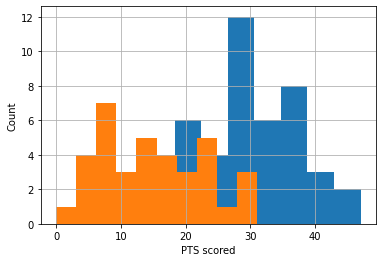

In [17]:
plt.xlabel("PTS scored") 
plt.ylabel("Count") 

X['DAL Pts Scored'][wins].hist()  # blue = wins
X['DAL Pts Scored'][losses].hist()  # orange = losses
plt.show()

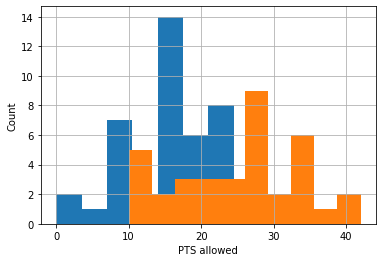

In [18]:
plt.xlabel("PTS allowed")
plt.ylabel("Count") 

X['DAL Pts Allowed'][wins].hist()  # blue histogram will show wins
X['DAL Pts Allowed'][losses].hist()  # orange shows losses

plt.show()

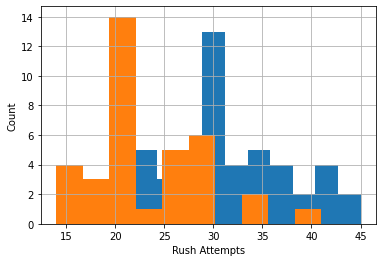

In [19]:
plt.xlabel("Rush Attempts") 
plt.ylabel("Count")

X['DAL Rush Atts'][wins].hist() 
X['DAL Rush Atts'][losses].hist() 

plt.show()

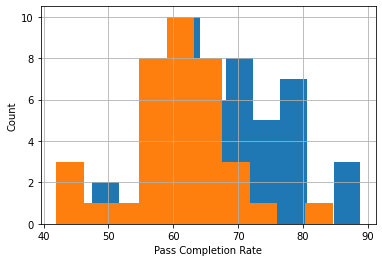

In [20]:
plt.xlabel("Pass Completion Rate") 
plt.ylabel("Count")

X['DAL Pass Comp Rate'][wins].hist() 
X['DAL Pass Comp Rate'][losses].hist()  

plt.show()

In [21]:
plt.xlabel("Interceptions thrown") 
plt.ylabel("Count")


X['DAL Ints thrown'][losses].hist() # losses are blue
X['DAL Ints thrown'][wins].hist()   # wins are orange

plt.show()

KeyError: 'DAL Ints thrown'

In [22]:
plt.xlabel("Interceptions thrown") 
plt.ylabel("Count")

X['DAL Ints thrown'][wins].hist()  
X['DAL Ints thrown'][losses].hist()


plt.show()

KeyError: 'DAL Ints thrown'

In [23]:
X.columns

Index(['DAL Pts Scored', 'DAL Pts Allowed', 'DAL Punts', 'DAL Pass Comp Rate',
       'DAL Pass Yds', 'DAL Rush Atts', 'DAL Rush Yards', 'DAL yds per Rush',
       'DAL Penalty Yds', 'OPP Penalty Yards', 'Home/Away',
       'DAL 3rd Down Conv', 'DAL Sacks', 'OPP Sacks', 'DAL Turnonvers',
       'OPP Turnonvers', 'OPP Rush yds', 'OPP Rush Atts', 'OPP Yds per Rush'],
      dtype='object')

In [24]:
model = LogisticRegression()

for col in X:
    model.fit(X[[col]], Y)  # Fit your newly initiated model to the column at X_feat and y
    pred = model.predict(X[[col]])  # Generate predictions based on the column at X_feat
    print("{}:".format(col))
    print("Total Accuracy:",sum(pred == Y) / len(Y))
    print()

DAL Pts Scored:
Total Accuracy: 0.7875

DAL Pts Allowed:
Total Accuracy: 0.7125

DAL Punts:
Total Accuracy: 0.6625

DAL Pass Comp Rate:
Total Accuracy: 0.6875

DAL Pass Yds:
Total Accuracy: 0.65

DAL Rush Atts:
Total Accuracy: 0.7625

DAL Rush Yards:
Total Accuracy: 0.7

DAL yds per Rush:
Total Accuracy: 0.55

DAL Penalty Yds:
Total Accuracy: 0.55

OPP Penalty Yards:
Total Accuracy: 0.55

Home/Away:
Total Accuracy: 0.55

DAL 3rd Down Conv:
Total Accuracy: 0.6625

DAL Sacks:
Total Accuracy: 0.5625

OPP Sacks:
Total Accuracy: 0.525

DAL Turnonvers:
Total Accuracy: 0.5875

OPP Turnonvers:
Total Accuracy: 0.6375

OPP Rush yds:
Total Accuracy: 0.525

OPP Rush Atts:
Total Accuracy: 0.55

OPP Yds per Rush:
Total Accuracy: 0.55



In [25]:
## Create X_train, X_test, y_train, and y_test with 33% of our total data in our test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [42]:
KNN = KNeighborsClassifier(n_neighbors=5) 
# cla = KNN(n_neighbor=5) 

KNN.fit(X_train, y_train) # Fit classifier to your X_train and y_train
prediction = KNN.predict(X_test)  # Generate predictions based on X_test

In [43]:
pred_acc = sum(prediction == y_test) / len(prediction)

print('Accuracy =') 
print(pred_acc)

Accuracy =
0.7083333333333334


In [65]:
svc = SVC(C = .9,kernel = 'linear')

svc.fit(X_train, y_train)
prediction2 = svc.predict(X_test)

In [66]:
pred_acc2 = sum(prediction2 == y_test) / len(prediction2)

print('Accuracy =') 
print(pred_acc2)

Accuracy =
0.875


In [61]:
df_pred = DataFrame(prediction2, columns=['Prediction'])
df_real = DataFrame(y_test, columns=['Actual'])

dfcomp = pd.concat([df_pred,df_real],axis=1)
dfcomp

,Prediction,Actual
0,1.0,NaN
1,0.0,NaN
2,0.0,NaN
3,1.0,NaN
4,0.0,NaN
5,1.0,NaN
6,0.0,NaN
7,0.0,NaN
8,0.0,NaN
9,1.0,NaN


In [62]:
print(y_test)

26    1.0
50    0.0
72    0.0
19    1.0
11    1.0
60    1.0
40    0.0
75    0.0
0     1.0
53    1.0
63    1.0
34    1.0
20    1.0
66    1.0
12    0.0
3     0.0
24    1.0
76    0.0
23    1.0
45    1.0
35    0.0
59    1.0
32    1.0
9     1.0
Name: DAL Win, dtype: float64


In [ ]:
pca = PCA(n_components=2)  # initialize a PCA class to reduce our data to 2 dimensions, which is n_components

In [ ]:
dalX_pca = pca.fit_transform(stats_dalX)  # we fit PCA to our dataset X and transform X from 4 dimensions to 2